In [3]:
import os
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



# preprocess a single tweet/text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    stop_words.add("embeddedurl")
    tokens = [word for word in tokens if word not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# evaluate the coherence for each number of topics in a range
def evaluate_coherence(corpus, dictionary, texts, num_topics_list):
    coherence_scores = []
    lda_models = []  # List to store LDA models

    for num_topics in num_topics_list:
        print(num_topics)
        # Create a new LDA model for each evaluation
        lda_model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        coherence = CoherenceModel(model=lda_model, texts=texts, corpus=corpus, dictionary=dictionary, coherence='c_v')
        coherence_scores.append((num_topics, coherence.get_coherence()))
        lda_models.append(lda_model)

    # Create a DataFrame to store the coherence scores
    coherence_df = pd.DataFrame(coherence_scores, columns=["Number of Topics", "Coherence Scores"])
    return coherence_df, lda_models


# # load the data and transform to DataFrame
# df = pd.read_csv(".././data/full_year.csv")
# df = df[df['religion'] == True][['clean_text']]
# df['tokenized_text'] = df['clean_text'].apply(preprocess_text)


# # load the data and transform to DataFrame
df = pd.read_csv(".././data/full_year.csv")
# Filter tweets containing "spirituality" but not "religion"
df = df[df['clean_text'].str.contains('religion', case=False) & ~df['clean_text'].str.contains('spirituality', case=False)]
df['tokenized_text'] = df['clean_text'].apply(preprocess_text)


# create vocabulary and doc2box doc-term matrix
dictionary = Dictionary(df['tokenized_text'])
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['tokenized_text']]

# path to the Mallet executable
mallet_path = 'mallet-2.0.8/bin/mallet'

# run and save the model
num_topics = 10 
lda = LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=num_topics, id2word=dictionary)
os.makedirs('models', exist_ok=True)
lda.save(os.path.join('models', 'lda_religion'))

# calculate coherence and save to csv
num_topics_list = list(range(2, 16, 1))
coherence_scores, lda_models = evaluate_coherence(doc_term_matrix, dictionary, df['tokenized_text'], num_topics_list)

# save all the LDA models
for i, model in enumerate(lda_models):
    model.save(os.path.join('models', f'lda_religion_{num_topics_list[i]}_topics'))

os.makedirs('coherence', exist_ok=True)
coherence_scores.to_csv(os.path.join('coherence', 'coherence_religion.csv'), index=False)

[nltk_data] Downloading package punkt to /Users/shtosti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shtosti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shtosti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.67253
<20> LL/token: -10.41158
<30> LL/token: -10.22915
<40> LL/token: -10.08698

0	5	religion support people muslim country land racism india voice rt justice winner politics human give time nationality including muslimban race 
1	5	religion people true islam christian rt jew problem country god israel check white muslim back black make thing world woman 
2	5	religion freedom life people gender race human government law color humanity free speech make terrorist muslim islamic hate pea

2


Mallet LDA: 2 topics, 1 topic bits, 1 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -9.39821
<20> LL/token: -9.34213
<30> LL/token: -9.29842
<40> LL/token: -9.26174

0	25	religion people god religious islam christian love rt church freedom make country life history science muslim book faith time world 
1	25	religion people god muslim hindu religious human world thing make race rt life country islam christian belief support time india 

<50> LL/token: -9.23345
<60> LL/token: -9.20752
<70> LL/token: -9.1822
<80> LL/token: -9.15909
<90> LL/token: -9.13809

0	25	religion people god religious love church science rt faith life time history belief christian politics book islam thing jesus political 
1	25	religion people muslim hindu god race human country make world islam india thing freedom christian religious true based hate rt 

<100> LL/token: -9.11702
<110> LL/token: -9.09619
<120> LL/token: -9.07883
<130> LL/token: -9.06203
<140> LL/token: -9.04914

0	25	re

3


Mallet LDA: 3 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -9.7373
<20> LL/token: -9.63531
<30> LL/token: -9.55696
<40> LL/token: -9.49999

0	16.66667	religion people god freedom life human muslim history religious science support race book gender world hindu ji respect terrorist class 
1	16.66667	religion people muslim rt god christian hindu religious islam thing make hate world love good church belief state politics man 
2	16.66667	religion people god country make free time islam world religious thing state belief politics culture christian law church hindu life 

<50> LL/token: -9.45339
<60> LL/token: -9.40685
<70> LL/token: -9.36342
<80> LL/token: -9.32123
<90> LL/token: -9.28482

0	16.66667	religion god life race human muslim freedom science hindu people history world book caste respect support gender humanity day love 
1	16.66667	religion people christian islam rt religious muslim hate thing love woman good world child year 

4


Mallet LDA: 4 topics, 2 topic bits, 11 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -9.96899
<20> LL/token: -9.8354
<30> LL/token: -9.73137
<40> LL/token: -9.65013

0	12.5	religion people make god church christian state time respect good love world rt faith law culture true thing land government 
1	12.5	religion people god religious thing christian rt country problem christianity time belief science made politics power make man year muslim 
2	12.5	religion muslim freedom people islam history support country free religious rt class book law state woman case india hindu speech 
3	12.5	religion people god life race hindu gender human caste world peace love ji muslim humanity thing religious islam color based 

<50> LL/token: -9.57913
<60> LL/token: -9.51211
<70> LL/token: -9.45528
<80> LL/token: -9.40676
<90> LL/token: -9.36142

0	12.5	religion people make christian church god faith good respect jesus true time school rt bad reason catholic bible thing chris

5


Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.1453
<20> LL/token: -9.9859
<30> LL/token: -9.86789
<40> LL/token: -9.77642

0	10	religion people god church christian human true thing christianity bible rt faith good race world religious jesus state catholic islam 
1	10	religion people muslim islam country time science race child love rt school jew world culture thing good belief faith hate 
2	10	religion people history support book class world woman case science racism love due business muslim paper rt study year islamic 
3	10	religion people freedom religious free hindu make life law muslim respect state government rt power india country thing color gender 
4	10	religion god people life islam ji religious christian hindu race peace world belief land man love holy caste make allah 

<50> LL/token: -9.70048
<60> LL/token: -9.63039
<70> LL/token: -9.55981
<80> LL/token: -9.49771
<90> LL/token: -9.44232

0	10	religio

6


Mallet LDA: 6 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.28986
<20> LL/token: -10.108
<30> LL/token: -9.97664
<40> LL/token: -9.87069

0	8.33333	religion god people love rt land christian thing muslim islam make faith man church christianity free belief time world culture 
1	8.33333	religion people history book science god class world case due paper study time love pay religious allah peace islam philosophy 
2	8.33333	religion race life human support gender people ji freedom based humanity color belief muslim racism caste sex age system social 
3	8.33333	religion people freedom islam country thing terrorist muslim woman hindu christian hate islamic rt speech god world pakistan time religious 
4	8.33333	religion people god religious muslim hindu faith power islam atheist church christian world bible life country belief thing love politics 
5	8.33333	religion people law make respect country government true state muslim free p

7


Mallet LDA: 7 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.40656
<20> LL/token: -10.19427
<30> LL/token: -10.04999
<40> LL/token: -9.93429

0	7.14286	religion people god church atheist faith christian reason thing religious islamic islam bible make time peaceful world secular jesus tax 
1	7.14286	religion people support true human religious country racism hindu give voice rt muslim politics year matter check god winner hai 
2	7.14286	religion god people respect muslim belief based terrorist thing world whatshappeninginmyanmar rt time islam strike religious woman mass country christianity 
3	7.14286	religion people world love rt god race state belief politics follow gt muslim caste make man hindu thing life woman 
4	7.14286	religion freedom law people hindu life gender make government ji free religious color human country land leader india caste race 
5	7.14286	religion history book science class people political case read lov

8


Mallet LDA: 8 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.50687
<20> LL/token: -10.27733
<30> LL/token: -10.11122
<40> LL/token: -9.97738

0	6.25	religion history science book freedom respect terrorist class case love political due business paper islamic study pay whatshappeninginmyanmar people philosophy 
1	6.25	religion people god christian country hindu thing islam good time man religious culture father work part world society muslim temple 
2	6.25	religion people islam thing woman child god time belief country muslim state love ca culture world choice prophet religious false 
3	6.25	religion support people racism thing voice muslim rt human person country god hate winner christian part matter world death including 
4	6.25	religion god religious power faith people day leader bible atheist land jesus church politics reason world good christianity muslim christian 
5	6.25	religion people hindu muslim rt based give christian

9


Mallet LDA: 9 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.58866
<20> LL/token: -10.33386
<30> LL/token: -10.15757
<40> LL/token: -10.02051

0	5.55556	religion freedom law free make people government state religious country leader speech church islamic constitution islam nation pakistan power peaceful 
1	5.55556	religion life gender people hindu color india race god matter crime caste country human hai ur wo sexual christian day 
2	5.55556	religion people god thing time christian live christianity religious gt jesus muslim rt feel hate christ make good faith belief 
3	5.55556	religion history book god love ji true class science case caste allah due holy read paper study great pay business 
4	5.55556	religion people god belief good thing bad word woman person black world religious fact life save church country death make 
5	5.55556	religion people politics god personal love christian science make culture christianity stop rel

10


Mallet LDA: 10 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.67329
<20> LL/token: -10.40979
<30> LL/token: -10.22392
<40> LL/token: -10.07998

0	5	religion support human people racism voice hate nationality winner christianity justice god culture give race including muslimban catholic aclu good 
1	5	religion life people race gender true color based human humanity crime matter woman strike check mass age hand sexual continue 
2	5	religion islam caste god love ji world muslim people country system hindu pakistan state allah great social rampal discrimination sikh 
3	5	religion people religious make law government free power belief state leader freedom god understand politics congress nation love christian world 
4	5	religion people hindu muslim god na rt hai thing wo hate time politics dont india indian make man world guy 
5	5	religion religious people god peace good thing gt tax year free problem question woman make entire bel

11


Mallet LDA: 11 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.73553
<20> LL/token: -10.45808
<30> LL/token: -10.26626
<40> LL/token: -10.10465

0	4.54545	religion people thing god jew good prophet truth year christianity jewish trump christian country time israel jesus religious call understand 
1	4.54545	religion make people islam god law free government freedom land state constitution pakistan quran good holy allah muslim country rt 
2	4.54545	religion people hindu country god politics child rt christian time religious thing belief jesus world love bad man money school 
3	4.54545	religion people true church atheist bible faith secular woman god christian check atheism state men politics country person control society 
4	4.54545	religion religious power based people hindu day nation leader great caste gt strike mass god muslim thing rt military peace 
5	4.54545	religion god people christian thing religious time spiritual day 

12


Mallet LDA: 12 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.79896
<20> LL/token: -10.50005
<30> LL/token: -10.30078
<40> LL/token: -10.14668

0	4.16667	religion people belief god post culture kid child hate call long time follow question christianity religious concept school part faith 
1	4.16667	religion support muslim god human world peace ji allah racism power give caste voice leader day religious rampal people humanity 
2	4.16667	religion people religious faith hindu rt country atheist politics state bjp church christianity culture wrong thing god temple year secular 
3	4.16667	religion people caste political love social politics based race system great form religious fight status discrimination age world society country 
4	4.16667	religion life gender race true god people color human freedom crime humanity quran check sexual continue person islam men rt 
5	4.16667	religion make people freedom law government state free c

13


Mallet LDA: 13 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.86534
<20> LL/token: -10.55199
<30> LL/token: -10.3337
<40> LL/token: -10.1658

0	3.84615	religion race caste ji social people age hindu based discrimination form sikh system rampal christian islam status colour country world 
1	3.84615	religion support racism people voice human winner rt justice including muslim muslimban nationality war aclu ban potus unjust country damaged 
2	3.84615	religion muslim god people hindu islam terrorist islamic freedom today whatshappeninginmyanmar based peaceful mass strike hand kabir lord fight military 
3	3.84615	religion true people check woman vaccine men time christian experience god church man child liberal thing politics covid type faith 
4	3.84615	religion respect people free god tax attack force rt killed person police christian terrorist education religious day rich destroyed animal 
5	3.84615	religion india hindu indian pe

14


Mallet LDA: 14 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.89844
<20> LL/token: -10.58307
<30> LL/token: -10.36126
<40> LL/token: -10.18087

0	3.57143	religion woman people islam world men rt tax hindu christian thing muslim politics good god talking dharma rich nigeria man 
1	3.57143	religion people god based mass strike father hand rule church world time christian fall covid jesus pure find point belief 
2	3.57143	religion people god white world thing rt make christian lie politics bad man christianity guy shit time na jesus country 
3	3.57143	religion muslim people islam prophet evil gt child christian god good thing man catholic rt money death false earth muhammad 
4	3.57143	religion people time religious politics person school belief faith question church culture basis hate thing god christian catholic group american 
5	3.57143	religion religious day land power people nation leader good world god post force allah faith

15


Mallet LDA: 15 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 76
total tokens: 1413150
<10> LL/token: -10.95363
<20> LL/token: -10.61802
<30> LL/token: -10.39008
<40> LL/token: -10.20414

0	3.33333	religion science history book case political read class business due paper study pay philosophy work english gt public law service 
1	3.33333	religion people god world jesus time faith man thinking save na christian men woman worship lot day christ belief nigeria 
2	3.33333	religion people love personal christianity jew shit jesus christian religious hell politics understand thing back judaism parent part country im 
3	3.33333	religion people love world time god christian thing rt live evidence fact faith news fuck kid politics terrorism church care 
4	3.33333	religion atheist secular reason faith people bible church atheism god good religious child logic medium muslim catholic thing sin tribe 
5	3.33333	religion power religious woman real world system life man belief nation 

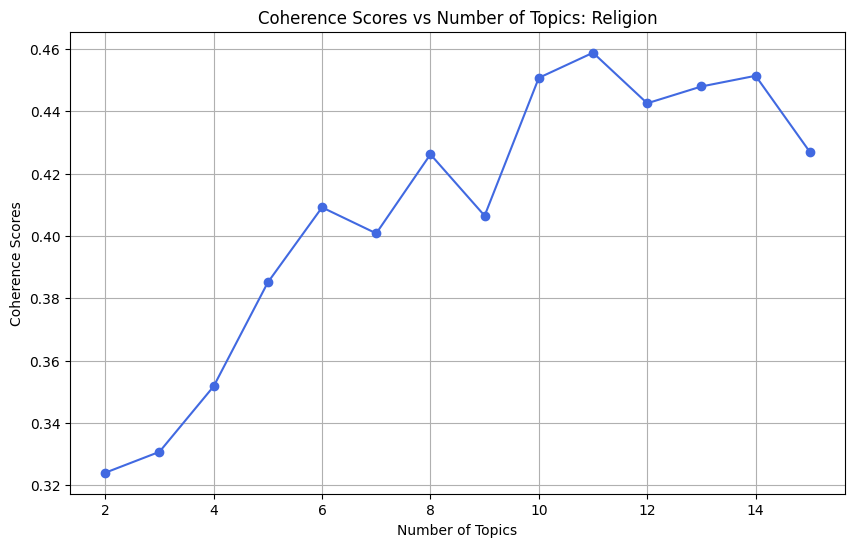

In [6]:
df_coherence = pd.read_csv("./coherence/coherence_religion.csv")

# Extracting data from the DataFrame
num_topics = df_coherence['Number of Topics']
coherence_scores = df_coherence['Coherence Scores']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_topics, coherence_scores, marker='o', linestyle='-', color='royalblue')
plt.title('Coherence Scores vs Number of Topics: Religion')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.grid(True)

output_folder = os.path.join('coherence', 'coherence_png')
os.makedirs(output_folder, exist_ok=True)
output_path = os.path.join(output_folder, 'coherence_religion.png')
plt.savefig(output_path)

plt.show()

In [5]:
html_dir = 'visualizations'
os.makedirs(html_dir, exist_ok=True)

for num_topics in range(2, 16):
    model_file = f'models/lda_religion_{num_topics}_topics'
    lda_model_mallet = LdaMallet.load(model_file)
    
    # convert Mallet LDA model to Gensim LDA model
    lda_model_gensim = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_model_mallet)
    vis_data = gensimvis.prepare(lda_model_gensim, doc_term_matrix, dictionary)
    
    # Save to HTML
    html_filename = os.path.join(html_dir, f'lda_religion_{num_topics}_topics.html')
    pyLDAvis.save_html(vis_data, html_filename)

/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shtosti/opt/anaconda3/lib/python3.9/site-packages/past/builti